In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


Mengupload dan Membaca Data

In [2]:
data = pd.read_csv('data.csv')
data

,judul_film,tahun_film,durasi_film,batas_usia,sinopsis_film,rating_film,jumlah_perating
0,1. Harry Potter and the Sorcerer's Stone,2001,2h 32m,PG,An orphaned boy enrolls in a school of wizardr...,7.6,(870K)
1,2. Once Upon a Time... in Hollywood,2019,2h 41m,R,As Hollywood's Golden Age is winding down duri...,7.6,(870K)
2,3. 3:10 to Yuma,2007,2h 2m,R,A small-time rancher agrees to hold a captured...,7.6,(335K)
3,4. Deadpool 2,2018,1h 59m,R,Foul-mouthed mutant mercenary Wade Wilson (a.k...,7.6,(682K)
4,5. 300,2006,1h 57m,R,"In the ancient battle of Thermopylae, King Leo...",7.6,(874K)
...,...,...,...,...,...,...,...
195,196. Taste of Cherry,1997,1h 35m,Not Rated,An Iranian man drives his car in search of som...,7.7,(38K)
196,197. After the Wedding,2006,2h,R,A manager of an orphanage in India is sent to ...,7.7,(38K)
197,198. The Motorcycle Diaries,2004,2h 6m,R,"Ernesto Guevara de la Serna, popularly known a...",7.7,(105K)
198,199. Never Look Away,2018,3h 9m,R,German artist Kurt Barnert has escaped East Ge...,7.7,(26K)


Memahami Data

In [3]:
data.head()
# mengecek 5 data pertama pada file json

,judul_film,tahun_film,durasi_film,batas_usia,sinopsis_film,rating_film,jumlah_perating
0,1. Harry Potter and the Sorcerer's Stone,2001,2h 32m,PG,An orphaned boy enrolls in a school of wizardr...,7.6,(870K)
1,2. Once Upon a Time... in Hollywood,2019,2h 41m,R,As Hollywood's Golden Age is winding down duri...,7.6,(870K)
2,3. 3:10 to Yuma,2007,2h 2m,R,A small-time rancher agrees to hold a captured...,7.6,(335K)
3,4. Deadpool 2,2018,1h 59m,R,Foul-mouthed mutant mercenary Wade Wilson (a.k...,7.6,(682K)
4,5. 300,2006,1h 57m,R,"In the ancient battle of Thermopylae, King Leo...",7.6,(874K)


In [4]:
data.tail()
# mengecek 5 data terakhir pada file json

,judul_film,tahun_film,durasi_film,batas_usia,sinopsis_film,rating_film,jumlah_perating
195,196. Taste of Cherry,1997,1h 35m,Not Rated,An Iranian man drives his car in search of som...,7.7,(38K)
196,197. After the Wedding,2006,2h,R,A manager of an orphanage in India is sent to ...,7.7,(38K)
197,198. The Motorcycle Diaries,2004,2h 6m,R,"Ernesto Guevara de la Serna, popularly known a...",7.7,(105K)
198,199. Never Look Away,2018,3h 9m,R,German artist Kurt Barnert has escaped East Ge...,7.7,(26K)
199,200. The Double Life of Véronique,1991,1h 38m,R,Two parallel stories about two identical women...,7.7,(54K)


In [5]:
data.shape
# melihat ukuran baris dan kolom

(200, 7)

In [6]:
data.columns

Index(['judul_film', 'tahun_film', 'durasi_film', 'batas_usia',
       'sinopsis_film', 'rating_film', 'jumlah_perating'],
      dtype='object')

In [7]:
data.describe()
#menunjukkan integer data type

,tahun_film,rating_film
count,200.000000,200.000000
mean,1998.070000,7.674500
std,17.908059,0.043695
min,1940.000000,7.600000
25%,1989.750000,7.600000
50%,2002.000000,7.700000
75%,2011.000000,7.700000
max,2024.000000,7.700000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   judul_film       200 non-null    object 
 1   tahun_film       200 non-null    int64  
 2   durasi_film      200 non-null    object 
 3   batas_usia       198 non-null    object 
 4   sinopsis_film    200 non-null    object 
 5   rating_film      200 non-null    float64
 6   jumlah_perating  200 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.1+ KB


Dari hasil diatas kita memahami bahwa:
1. Dataset ini berisi 200 baris dengan 7 kolom 
2. ada 5 kolom dngan data type object, 1 integer dan 1 float
3. Daan paling penting dataset ini berisikan informasi mengenai kepopuleran 200 film

Mengecek data ganda/duplikasi dan missin data

In [9]:
#mengecek data uniqe
data.nunique()

judul_film         200
tahun_film          61
durasi_film         81
batas_usia           8
sinopsis_film      200
rating_film          2
jumlah_perating    163
dtype: int64

In [10]:
data['batas_usia'].unique()
data['rating_film'].unique()

array([7.6, 7.7])

In [11]:
(data.isnull().sum()/(len(data)))*100

judul_film         0.0
tahun_film         0.0
durasi_film        0.0
batas_usia         1.0
sinopsis_film      0.0
rating_film        0.0
jumlah_perating    0.0
dtype: float64

In [12]:
data.isnull().sum()

judul_film         0
tahun_film         0
durasi_film        0
batas_usia         2
sinopsis_film      0
rating_film        0
jumlah_perating    0
dtype: int64

Dari hasil diatas, kita mengetahui:
1. Ada beberapa data yang memiliki nilai duplikat, seperti: rating film dan batas usia
2. Data dengan missin value hanya ada pada kolom: batas usia. dengan total 2 value

Merapihkan Data

In [13]:
data['judul_film'] = data['judul_film'].apply(lambda x: ' '.join(x.split()[1:]))
# kita mengambil penomoran yang menempel pada judul untuk kemudian akan kita drop

In [14]:
data_encoded = data.drop(['sinopsis_film', "durasi_film", "batas_usia", "jumlah_perating"], axis=1)

In [15]:
# mengubah durasi film menjadi bentuk menit
def mengubah_ke_menit(durasi):
    jam = 0
    menit = 0

    if "h" in durasi:
        jam = int(durasi.split("h")[0].strip())
    
    if "m" in durasi:
        menit = int(durasi.split("h")[1].replace("m", " ").strip())

    return jam * 60 + menit

data["durasi_film_baru"] = data["durasi_film"].apply(mengubah_ke_menit)

In [16]:
# Mengeloompokkan kolom 'batas_usia' menjadi 'under 17' dan '17+' dimana "under" = 0 dan "+"" = 17
data_encoded["batas_usia_binned"] = data["batas_usia"].apply(lambda x: 0 if x in ['G', 'PG', 'Approved'] else 1)

# Mengelompokkan kolom durasi film yang sudah diubah kedalam bentuk menit. menjaadi 3 kategori
data_encoded["durasi_film_binned"] = data["durasi_film_baru"].apply(
    lambda x: "pendek" if x <= 100 else "normal" if 101 <= x < 161 else "kepanjangan"
)
# Mengubah string menggunakan 1 hot encoding untuk durasi_film_binned
data_encoded = pd.get_dummies(data_encoded, columns=['durasi_film_binned'])

# Menghilangkan kurung dan "K" pada jumlah perating
data_encoded["jumlah_perating_fixed"] = data["jumlah_perating"].apply(
    lambda x: (
        (int(x.replace("(", "").replace(")", "").replace("K", "")) * 1000)
        if "K" in x
        else int(x.replace("(", "").replace(")", "").replace("K", ""))
    )
)

Statistic Summary

In [17]:
data_encoded.describe().T
# memberikan kesimpulan statistika 

,count,mean,std,min,25%,50%,75%,max
tahun_film,200.0,1998.0700,17.908059,1940.0,1989.75,2002.0,2011.0,2024.0
rating_film,200.0,7.6745,0.043695,7.6,7.60,7.7,7.7,7.7
batas_usia_binned,200.0,0.7800,0.415286,0.0,1.00,1.0,1.0,1.0
jumlah_perating_fixed,200.0,257465.0000,212694.342170,26000.0,99750.00,197000.0,346250.0,911000.0


dari hasil diatas diketahui:
1. rata rata film yang masuk top 200 merupakan film tahun 1998
2. top 200 film berada pada rentang tahun 1940 s/d 2024
3. rata rata film memiliki rating 7,6. begitu juga rentang rating untuk semua film berada pada 7,6 s/d 7,7
4. Batas usia film mayoritas 1 atau 17+
5. secara ringkas data seperti tidak memiliki outlier

Sebelum melakukan EDA, data akan dipisahkan berdasarkan 2 variabel:
1. categorical
2. numerical

In [18]:
cat_cols=data_encoded.select_dtypes(include=['object']).columns
num_cols = data_encoded.select_dtypes(include=np.number).columns.tolist()

print("categorical variables:")
print(cat_cols)

print("numerical catagories:")
print(num_cols)

categorical variables:
Index(['judul_film'], dtype='object')
numerical catagories:
['tahun_film', 'rating_film', 'batas_usia_binned', 'jumlah_perating_fixed']


In [47]:
data_encoded

,judul_film,tahun_film,rating_film,batas_usia_binned,durasi_film_binned_kepanjangan,durasi_film_binned_normal,durasi_film_binned_pendek,jumlah_perating_fixed
0,Harry Potter and the Sorcerer's Stone,2001,7.6,0,False,True,False,870000
1,Once Upon a Time... in Hollywood,2019,7.6,1,True,False,False,870000
2,3:10 to Yuma,2007,7.6,1,False,True,False,335000
3,Deadpool 2,2018,7.6,1,False,True,False,682000
4,300,2006,7.6,1,False,True,False,874000
...,...,...,...,...,...,...,...,...
195,Taste of Cherry,1997,7.7,1,False,False,True,38000
196,After the Wedding,2006,7.7,1,False,True,False,38000
197,The Motorcycle Diaries,2004,7.7,1,False,True,False,105000
198,Never Look Away,2018,7.7,1,True,False,False,26000


Melakukan EDA

Variabel numerik dapat divisualisasikan menggunakan Histogram, Box Plot, Density Plot, dll.

In [19]:
# Menganalisis/memvisualisasikan dataset dengan mengambil satu variabel pada satu waktu:
# Visualisasi data sangat penting; kita harus memutuskan grafik apa yang akan dibuat untuk lebih memahami data. Dalam artikel ini, kami memvisualisasikan data menggunakan perpustakaan Matplotlib dan Seaborn.
# Matplotlib adalah perpustakaan plotting 2D Python yang digunakan untuk membuat grafik dasar, dan kami menggunakan Matplotlib.
# Seaborn juga merupakan perpustakaan Python yang dibangun di atas Matplotlib yang menggunakan baris kode pendek untuk membuat dan menata plot statistik dari Pandas dan Numpy.
# Analisis univariat dapat dilakukan untuk variabel Kategorikal maupun Numerik.

tahun_film
Skew : -0.97


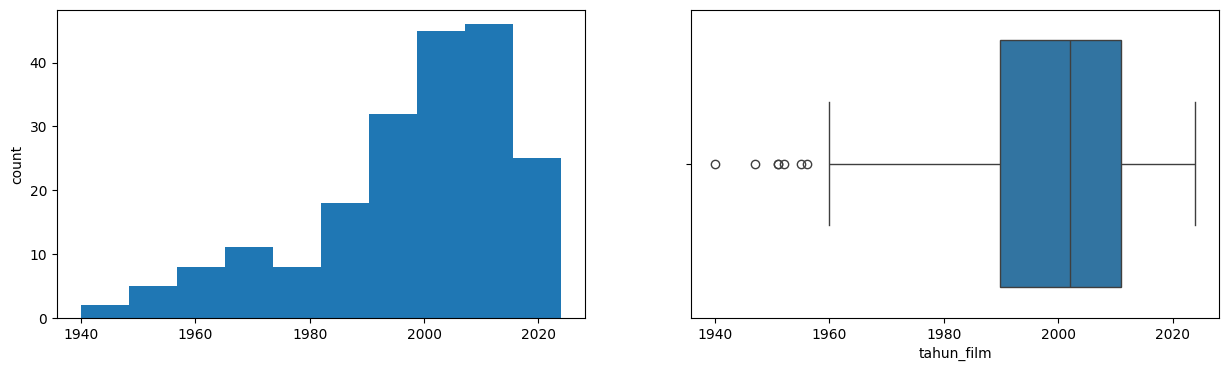

rating_film
Skew : -1.13


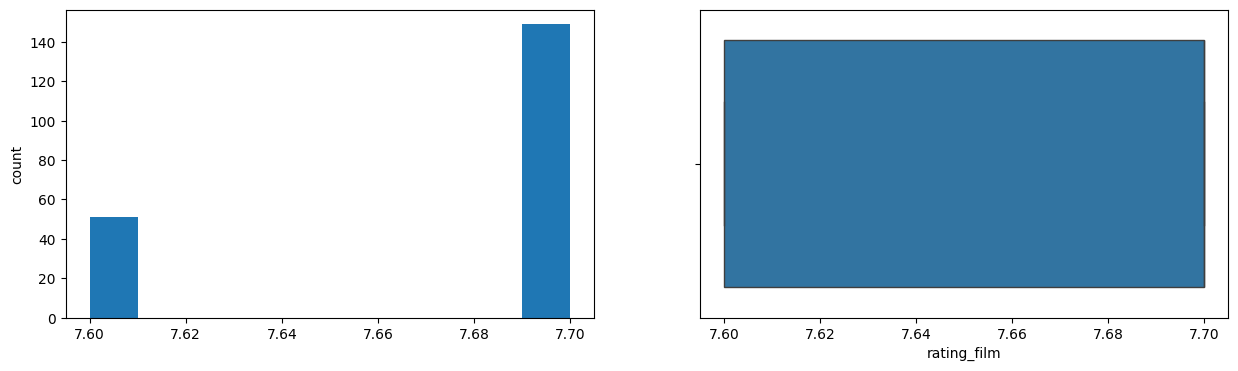

batas_usia_binned
Skew : -1.36


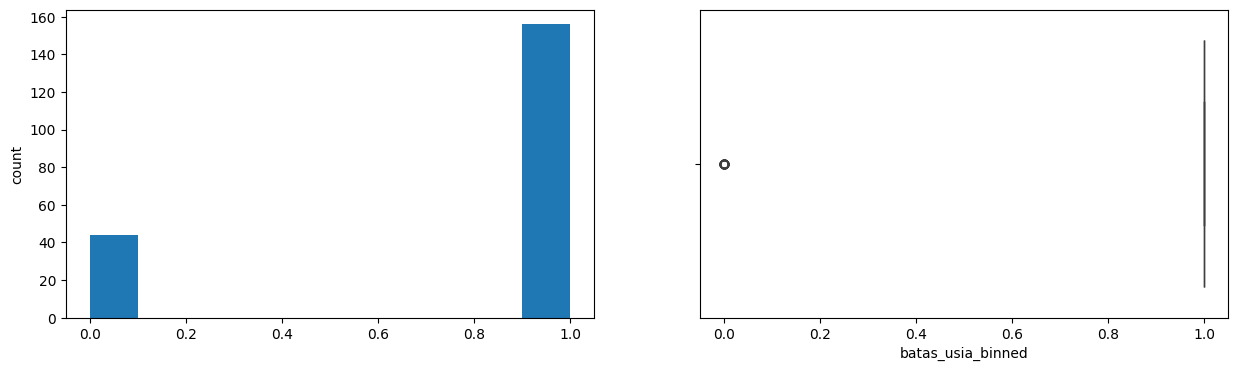

jumlah_perating_fixed
Skew : 1.27


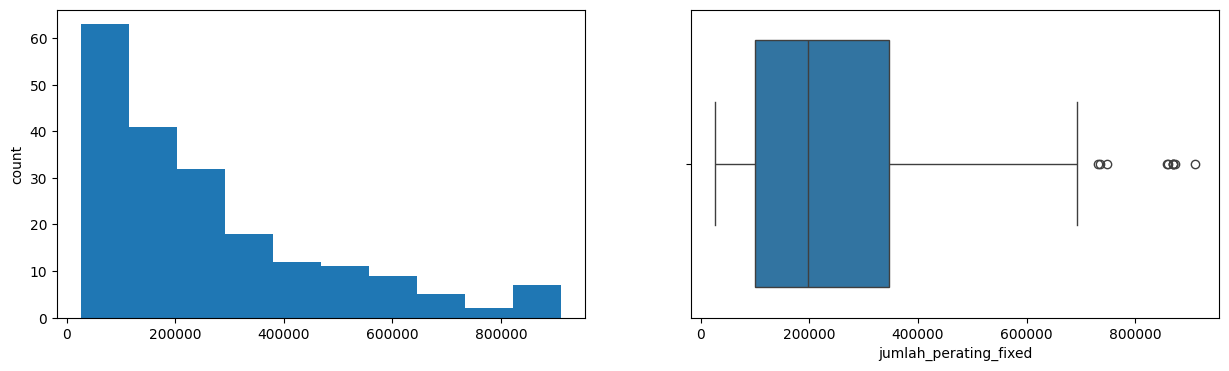

In [20]:
for col in num_cols:
    print(col)
    print('Skew :', round(data_encoded[col].skew(), 2))
    
    plt.figure(figsize=(15, 4))
    
    # Histogram plot
    plt.subplot(1, 2, 1)
    data_encoded[col].hist(grid=False)
    plt.ylabel('count')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_encoded[col])
    
    plt.show()


Kita mengiterasi setiap kolom pada variabel num_cols. Dan didapatkan hasil:
1. sebagian besar film yang berada pada top 200 dirilis pada tahun 1990, sampai puncaknya berada diantara tahun 2000 s/d 2020
2. film yang dirilis sebelum tahun 1960 berjumlah sedikit, sehingga menjadi outlier
3. kisaran rating untuk film berkisar antara 7,60 sampai dengan 7,70. dengan jumlah terbanyak berada pada 7.70
4. tidak ditemukan outlier pada rating film
5. 40 dari 200 film memiliki batas umur dibawah 17+, sehingga dianggap sebagai outlier (tidak akan di drop)
6. jumlah orang2 yang merating pada suatu film memiliki median 200.000

Categorical Variabel akan divusialisasikan menggunakan count plot

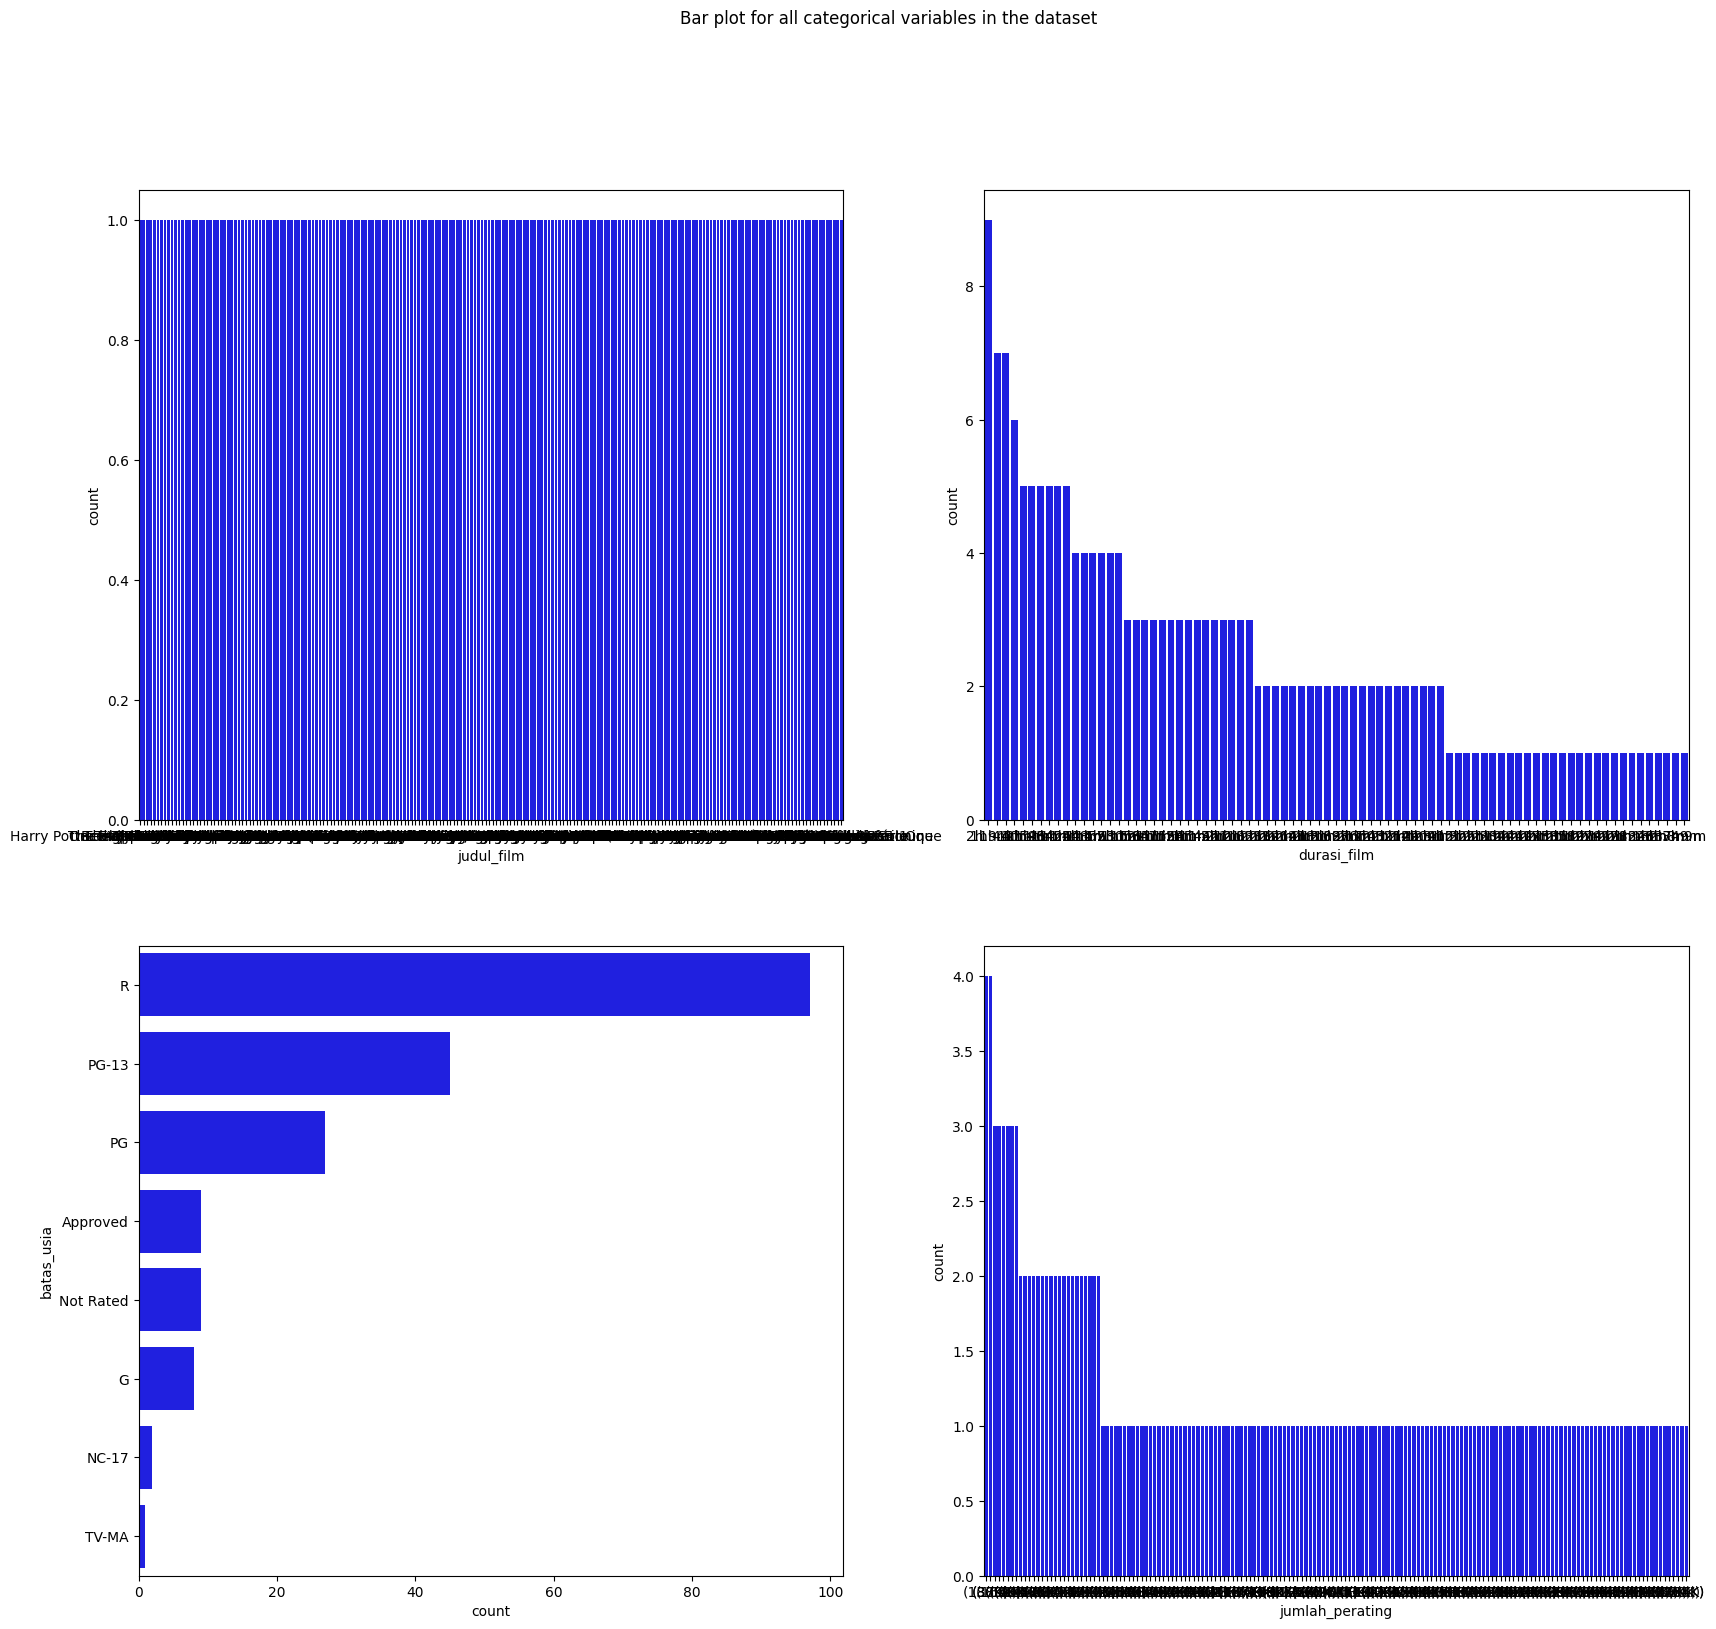

In [21]:
fig, axes = plt.subplots(2, 2, figsize = (20, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'judul_film', data = data, color = 'blue', 
              order = data['judul_film'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'durasi_film', data = data, color = 'blue', 
              order = data['durasi_film'].value_counts().index);
sns.countplot(ax = axes[1, 0], y = 'batas_usia', data = data, color = 'blue', 
              order = data['batas_usia'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'jumlah_perating', data = data, color = 'blue', 
              order = data['jumlah_perating'].value_counts().index);



dari count plot diketahui:
1. Mayoritas Film memiliki batas usia Remaja (R). (masuk akal karena anak muda seneng banget movies date)

Transformasi Data

In [22]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
            # Jika semua elemen di dalam kolom tersebut bernilai 1.0, fungsi akan menambahkan angka 1 terlebih dahulu
        else:
            data[colname + '_log'] = np.log(data[colname])
            # Jika kondisi tidak terpenuhi, fungsi langsung melakukan log transformation pada kolom tersebut
    data.info()

In [23]:
log_transform(data,['tahun_film'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   judul_film        200 non-null    object 
 1   tahun_film        200 non-null    int64  
 2   durasi_film       200 non-null    object 
 3   batas_usia        198 non-null    object 
 4   sinopsis_film     200 non-null    object 
 5   rating_film       200 non-null    float64
 6   jumlah_perating   200 non-null    object 
 7   durasi_film_baru  200 non-null    int64  
 8   tahun_film_log    200 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 14.2+ KB


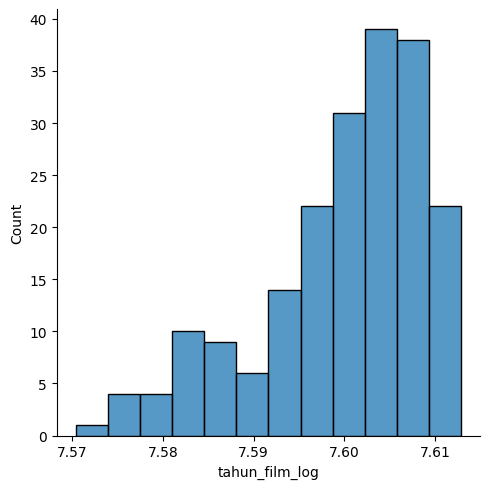

In [24]:
#Log transformation of the feature 'rating_film'
sns.displot(data["tahun_film_log"])

<Figure size 400x400 with 0 Axes>

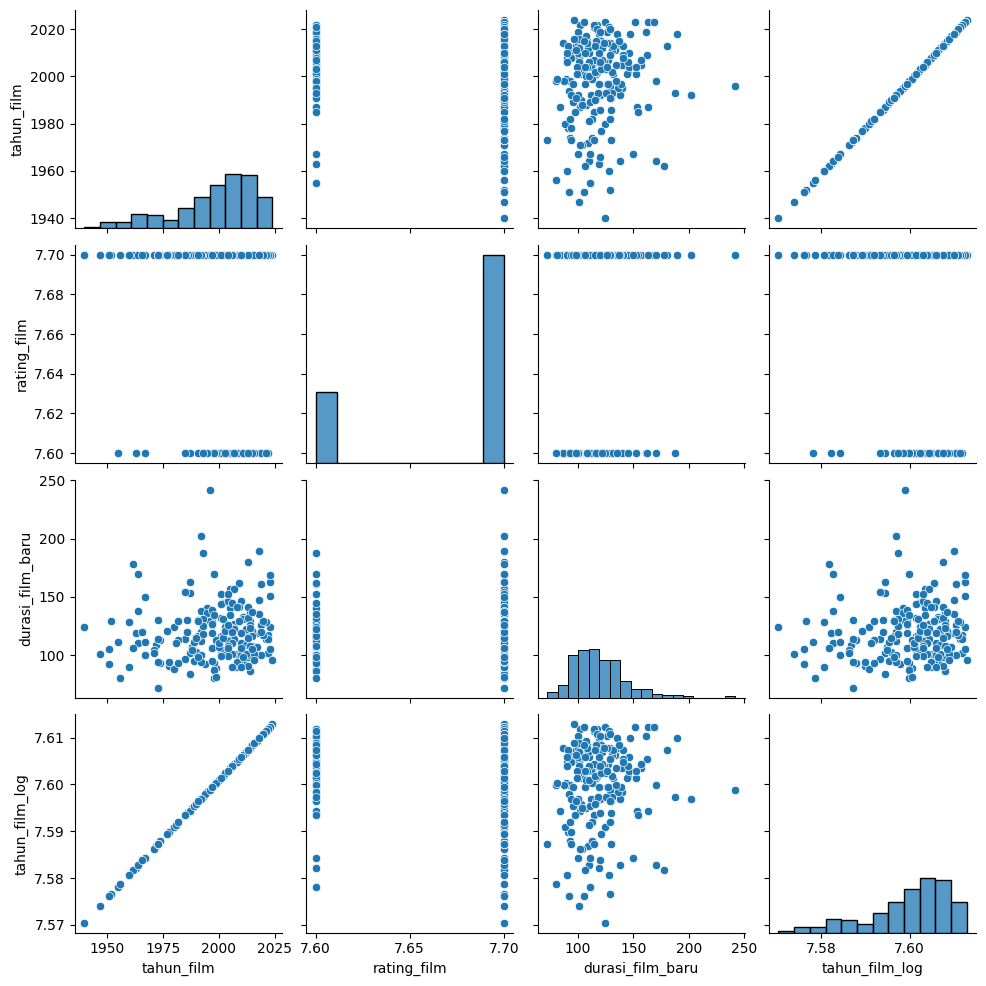

In [25]:
plt.figure(figsize=(4, 4))
sns.pairplot(data=data.drop(['judul_film'],axis=1))
plt.show()

penggunaan Bar plot sebagai jenis grafik yang berguna untuk menunjukkan hubungan antara variabel kategorikal dan variabel kontinu

In [26]:
correlation = data_encoded.drop(
    [
        "judul_film",
    ],
    axis=1,
).corr()

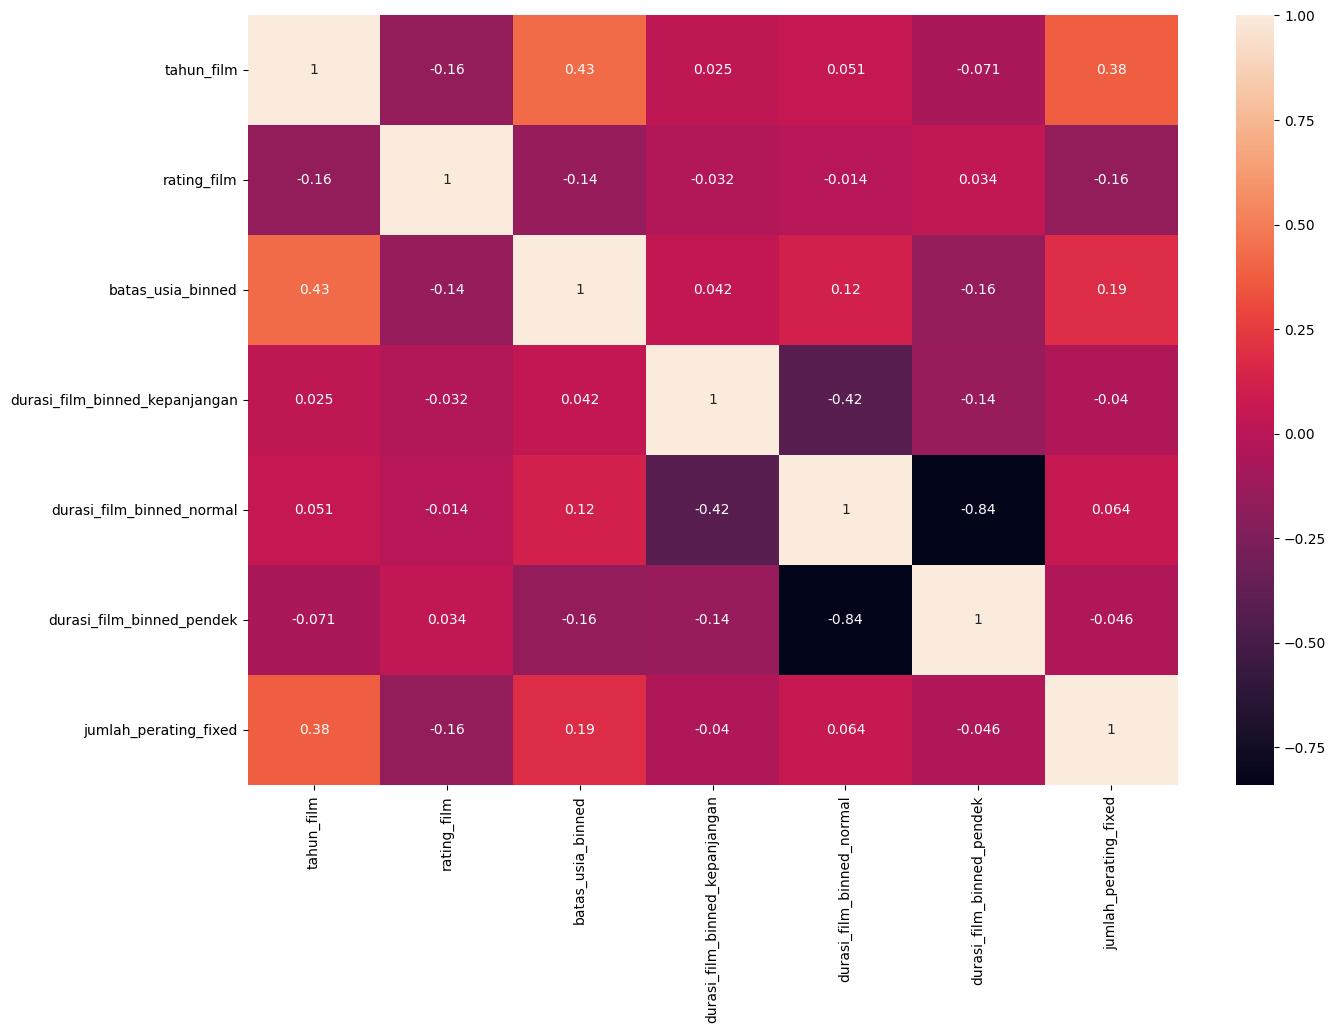

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.show()

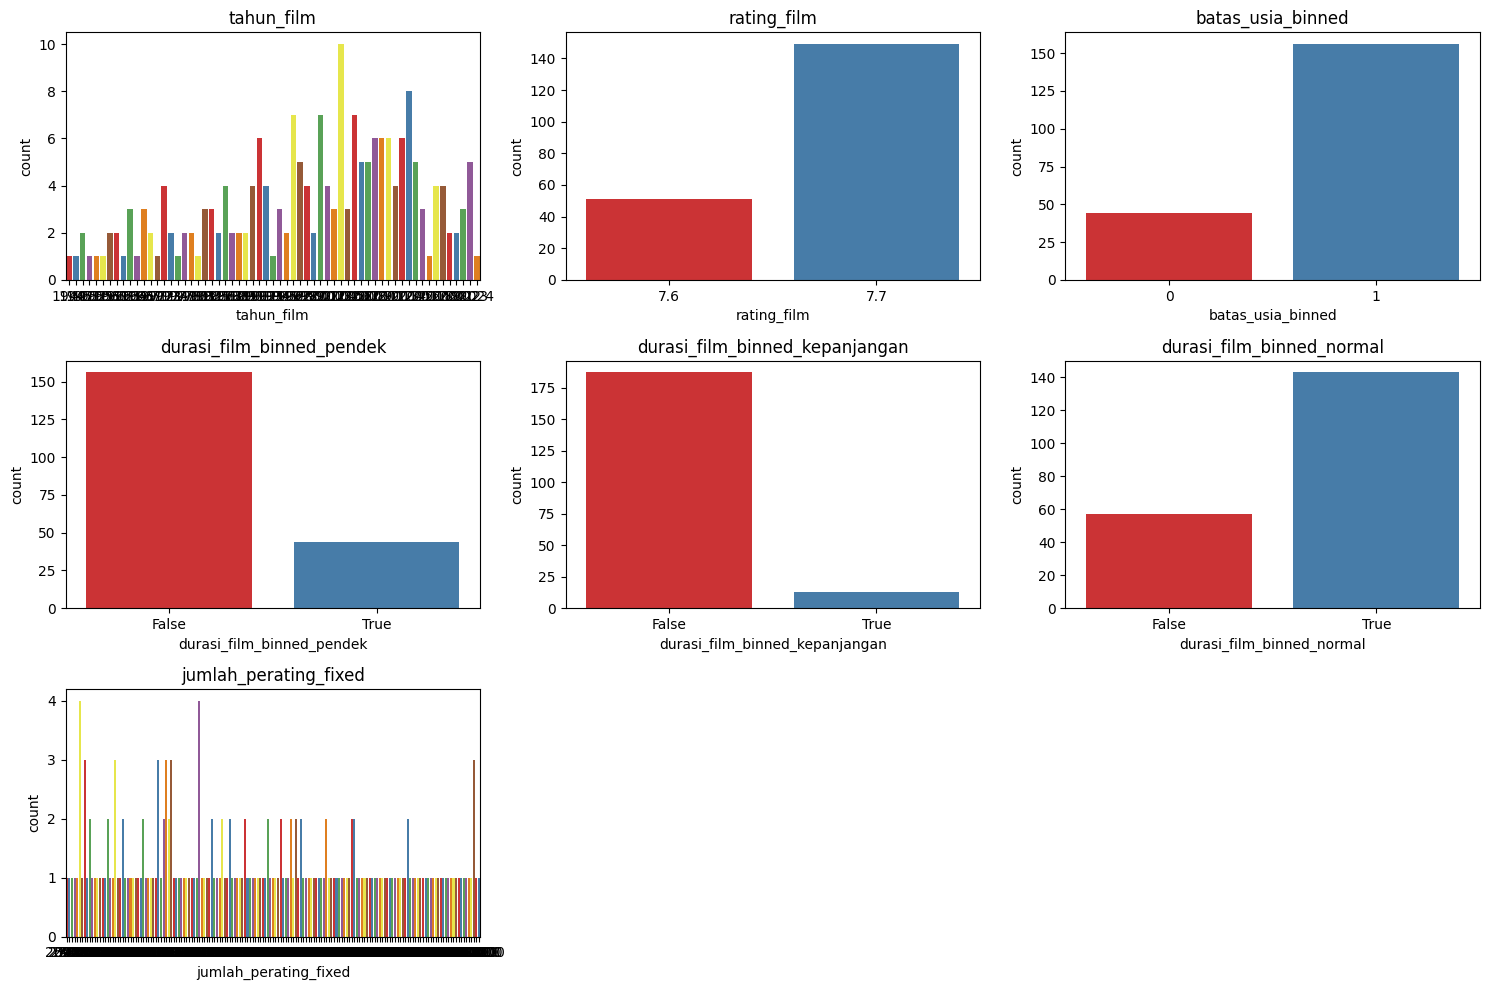

In [28]:
# Barplot Visualization
col_bar = ['tahun_film', 'rating_film', 
           'batas_usia_binned','durasi_film_binned_pendek', 'durasi_film_binned_kepanjangan', 'durasi_film_binned_normal', "jumlah_perating_fixed"]

color_palette = sns.color_palette("Set1", len(col_bar))

plt.figure(figsize=(15, 10)) 
for i, column in enumerate(col_bar, 1):
    plt.subplot((len(col_bar)//3)+1, 3, i)
    sns.countplot(data=data_encoded, x=column, palette=color_palette)
    plt.title(column)

plt.tight_layout()
plt.show()# Barplot Visualization

Barplot diatas menjelaskan beberapa hal:
1. ada 1 tahun dimana 10 film masuk sebagai nominasi top 200
2. film dengan durasi terpanjang berjumlah lebih sedikit, dan durasi normal berjumlah paling banyak
3. mayoritas film memiliki batas usia 17 +
4. top 200 film mayoritas memiliki rating 7.7

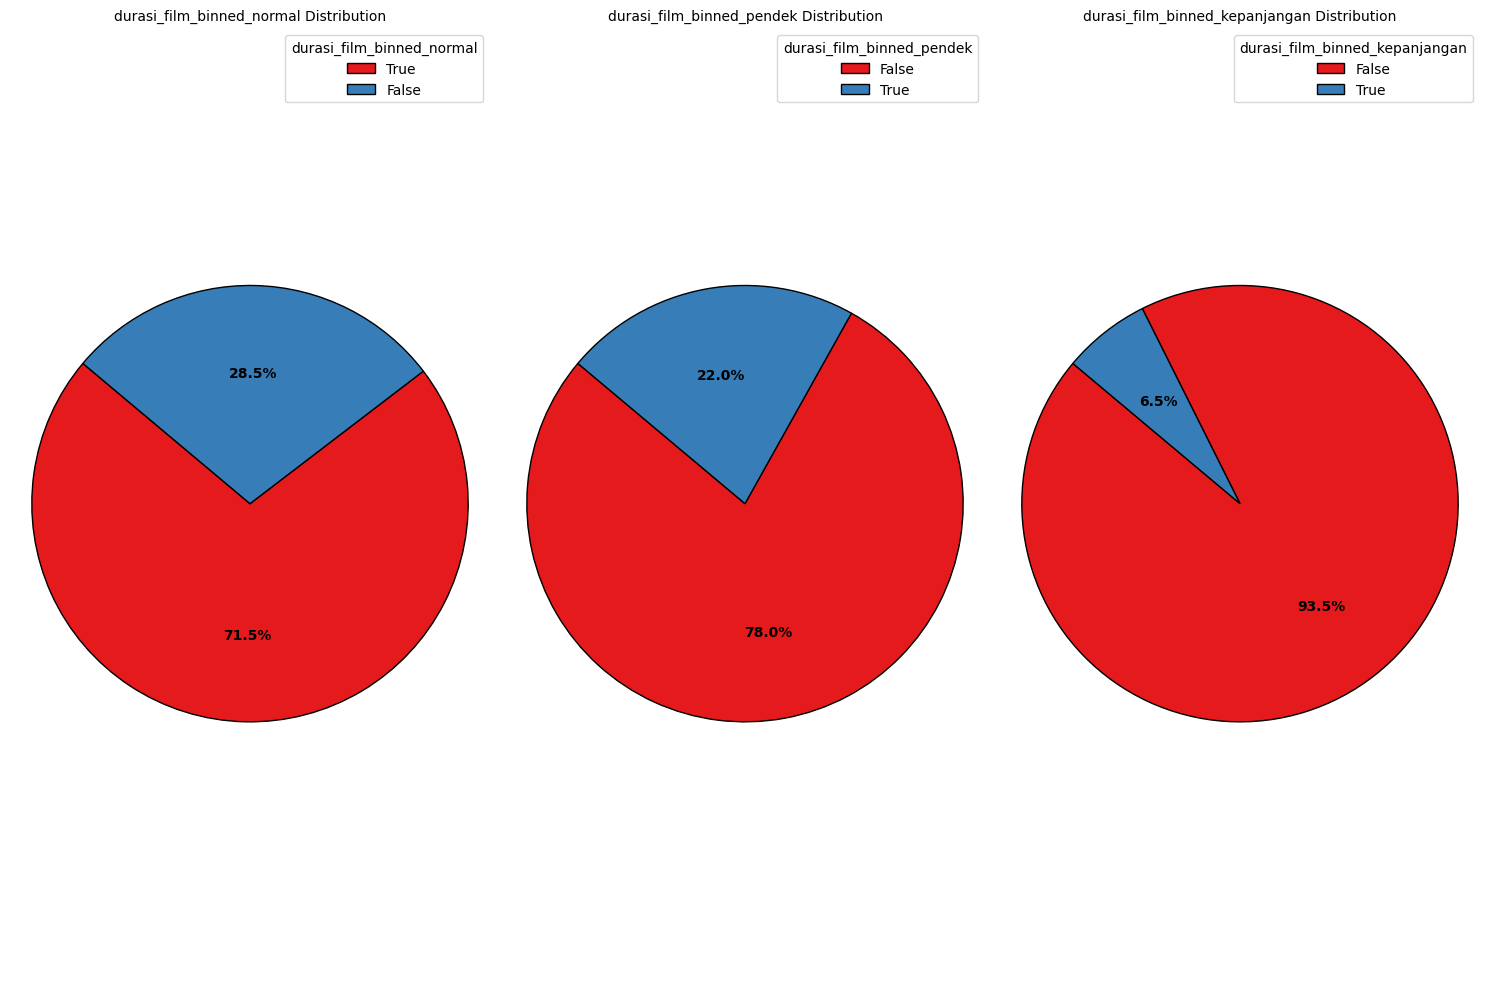

In [29]:
# Pie Chart visualization
col_pie = ['durasi_film_binned_normal', 'durasi_film_binned_pendek', 'durasi_film_binned_kepanjangan']
df_pie = data_encoded[col_pie]

percentage_threshold = 5.5
total_rows = len(df_pie)
for col in col_pie:
    value_counts = df_pie[col].value_counts()
    df_pie[col] = df_pie[col].apply(lambda x: 'other' if (value_counts[x] / total_rows) * 100 < percentage_threshold else x)

color_palette = sns.color_palette("Set1", 20)

plt.figure(figsize=(15, 10)) 
for i in range(len(col_pie)):
    plt.subplot(1, 3, i+1)
    var = df_pie[col_pie[i]].value_counts()
    
    colors = color_palette[:len(var)]
    if 'other' in var:
        other_index = var.index.get_loc('other')
        colors[other_index] = 'lightgray'
    
    wedges, texts, autotexts = plt.pie(var, labels=None, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
    
    for text, autotext in zip(texts, autotexts):
        text.set(size=10, weight='bold')
        autotext.set(size=10, weight='bold')

    plt.axis('equal')
    plt.title(f'{col_pie[i]} Distribution', fontsize=10)    
    plt.legend(wedges, var.index, title=f'{col_pie[i]}', loc='best')

plt.tight_layout()
plt.show()

dari pie chart diatas, sudah jelas bahwa film top 200 mayoritas adalah film dengan durasi normal

K-Means

In [30]:
col_box = ["tahun_film", "rating_film", "batas_usia_binned", "jumlah_perating_fixed"]
color_palette = sns.color_palette("Set1", len(col_box))

In [31]:
scaler = StandardScaler()

df_pca = data_encoded[col_box]
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_pca)
pca_data = scaler.fit_transform(pca_data)
pca_data = pd.DataFrame(pca_data, columns=["pc1", "pc2"])  # Menggunakan "pc1" dan "pc2" karena kita hanya memiliki 2 komponen
print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

PCA explained variance ratio:
 1.000 0.000


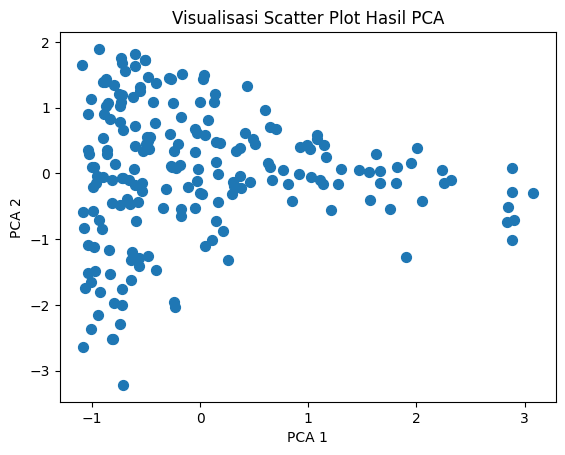

In [32]:
plt.scatter(pca_data["pc1"], pca_data["pc2"], s = 50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Scatter Plot Hasil PCA')
plt.show()

In [33]:
pca_data = pca_data.values

In [34]:
wcss = []
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(pca_data)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(pca_data, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [254.96850840147056]
silhoutte score for n_clusters = 2 is 0.3969177569519087
wcss score for n_cluster = 3 is [254.96850840147056, 125.81342771838098]
silhoutte score for n_clusters = 3 is 0.46293151239837327
wcss score for n_cluster = 4 is [254.96850840147056, 125.81342771838098, 86.03172573783495]
silhoutte score for n_clusters = 4 is 0.4288941635509788
wcss score for n_cluster = 5 is [254.96850840147056, 125.81342771838098, 86.03172573783495, 62.071599685133435]
silhoutte score for n_clusters = 5 is 0.4329864824144601
wcss score for n_cluster = 6 is [254.96850840147056, 125.81342771838098, 86.03172573783495, 62.071599685133435, 52.95434838886147]
silhoutte score for n_clusters = 6 is 0.38752676311115253
wcss score for n_cluster = 7 is [254.96850840147056, 125.81342771838098, 86.03172573783495, 62.071599685133435, 52.95434838886147, 44.62570096315515]
silhoutte score for n_clusters = 7 is 0.3808122283593176
wcss score for n_cluster = 8 is [254.96850840

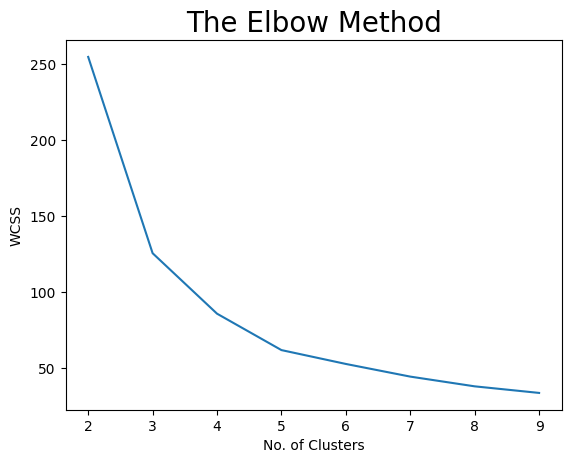

In [35]:
# Visualizing Elbow Method
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

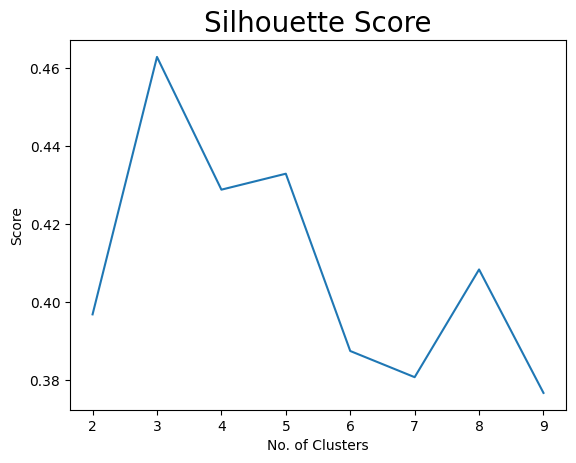

In [36]:
# Visualizing Silhouette Score
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [37]:
# Model Build
# Based on the consideration of Elbow Method and Silhouette Score
# I will use many clusters of 3
kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans= kmeansmodel.fit_predict(pca_data)

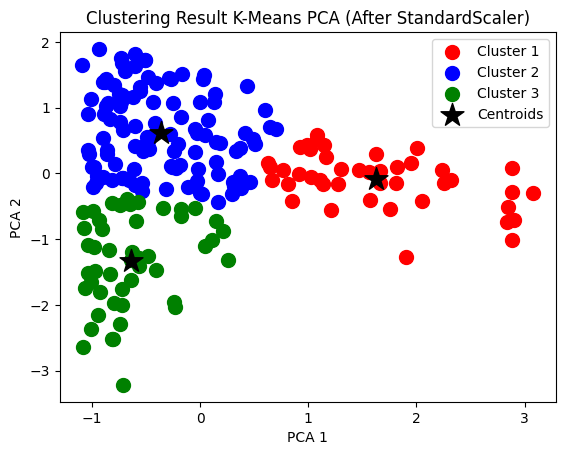

In [38]:
# Cluster visualization using scatter plot
plt.scatter(pca_data[y_kmeans == 0, 0], pca_data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_data[y_kmeans == 1, 0], pca_data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_data[y_kmeans == 2, 0], pca_data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Display the cluster center
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids', marker = '*')
plt.title('Clustering Result K-Means PCA (After StandardScaler)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [66]:
data_encoded.drop(['durasi_film_binned_kepanjangan', 'durasi_film_binned_normal', 'durasi_film_binned_pendek', 'judul_film'], axis = 1, inplace = True)

In [69]:
df_clustered = data_encoded.copy()
df_clustered['Cluster'] = kmeansmodel.labels_

In [70]:
# Menghitung statistik deskriptif per kluster
cluster_stats = df_clustered.groupby('Cluster').agg(['mean', 'median', 'std'])
print(cluster_stats)

          tahun_film                    rating_film                   \
                mean  median        std        mean median       std   
Cluster                                                                
0        2007.558140  2008.0   6.032856    7.665116    7.7  0.048224   
1        2005.917431  2006.0  10.159039    7.671560    7.7  0.045321   
2        1971.750000  1973.0  12.470390    7.689583    7.7  0.030871   

        batas_usia_binned                  jumlah_perating_fixed            \
                     mean median       std                  mean    median   
Cluster                                                                      
0                0.883721    1.0  0.324353         601418.604651  589000.0   
1                0.880734    1.0  0.325598         181238.532110  154000.0   
2                0.458333    0.0  0.503534         122437.500000  103500.0   

                        
                   std  
Cluster                 
0        154672.808667 

1. Tahun Film
Cluster 0: Rata-rata tahun film berada di 2007.56 dengan median 2008, dan standar deviasi 6.03. Ini menunjukkan bahwa film-film dalam cluster ini relatif baru, dengan penyebaran yang sempit di sekitar tahun 2008.
Cluster 1: Rata-rata tahun film berada di 2005.92 dengan median 2006, dan standar deviasi yang lebih besar yaitu 10.16, menunjukkan bahwa film-film di cluster ini cenderung sedikit lebih tua dan memiliki rentang tahun yang lebih luas dibandingkan cluster 0.
Cluster 2: Rata-rata tahun film adalah 1971.75 dengan median 1973, serta standar deviasi 12.47. Ini menunjukkan bahwa film-film dalam cluster ini adalah film-film lama, dengan rentang tahun yang cukup lebar.
2. Rating Film
Cluster 0: Memiliki rata-rata rating film 7.67, median 7.7, dan standar deviasi 0.048. Rating dalam cluster ini sangat konsisten dengan penyebaran yang kecil, menunjukkan bahwa film-film di cluster ini cenderung memiliki rating yang stabil.
Cluster 1: Rata-rata rating film 7.67 dengan median 7.7, dan standar deviasi 0.045. Ini juga menunjukkan konsistensi yang tinggi dalam hal rating, hampir sama dengan cluster 0.
Cluster 2: Memiliki rata-rata rating sedikit lebih tinggi yaitu 7.69 dengan median 7.7 dan standar deviasi 0.031, menunjukkan bahwa film-film lama di cluster ini sedikit lebih tinggi dalam hal rata-rata rating, namun tetap cukup konsisten.
3. Batas Usia (Binned)
Cluster 0: Sebagian besar film dalam cluster ini memiliki kategori batas usia 17+ (batas usia binned mean 0.88, median 1), menunjukkan bahwa sebagian besar film di sini adalah film untuk penonton dewasa.
Cluster 1: Cluster ini mirip dengan cluster 0, dengan mean 0.88 dan median 1, menunjukkan mayoritas film juga ditargetkan untuk audiens dewasa.
Cluster 2: Berbeda dengan cluster lainnya, mean batas usia binned di cluster ini adalah 0.46, dengan median 0, menunjukkan bahwa banyak film di cluster ini untuk penonton di bawah 17 tahun (kategori remaja atau keluarga).
4. Jumlah Perating
Cluster 0: Film-film dalam cluster ini memiliki rata-rata jumlah perating sebesar 601,418, dengan median 589,000 dan standar deviasi 154,673. Ini menunjukkan bahwa film-film dalam cluster ini adalah film populer dengan jumlah perating yang sangat tinggi, tetapi ada variasi yang cukup besar.
Cluster 1: Cluster ini memiliki rata-rata jumlah perating yang jauh lebih kecil yaitu 181,239 dengan median 154,000 dan standar deviasi 100,863, menunjukkan film-film yang memiliki popularitas menengah.
Cluster 2: Film-film dalam cluster ini memiliki rata-rata jumlah perating yang paling sedikit, yaitu 122,437, dengan median 103,500 dan standar deviasi 80,352, menunjukkan bahwa film-film ini kurang populer dibandingkan dua cluster lainnya.
Kesimpulan Analisis:
Cluster 0 terdiri dari film-film baru dan populer, dengan jumlah perating yang tinggi, batas usia dewasa, dan rating yang konsisten.
Cluster 1 terdiri dari film-film yang sedikit lebih tua, dengan popularitas menengah, namun ratingnya masih cukup stabil dan kebanyakan untuk audiens dewasa.
Cluster 2 terdiri dari film-film lama, dengan jumlah perating paling sedikit, batas usia yang lebih cenderung untuk penonton muda atau semua umur, namun ratingnya masih cukup tinggi meski tidak terlalu populer.

Hierachical Clustering

In [63]:
data_encoded

,judul_film,tahun_film,rating_film,batas_usia_binned,durasi_film_binned_kepanjangan,durasi_film_binned_normal,durasi_film_binned_pendek,jumlah_perating_fixed
0,Harry Potter and the Sorcerer's Stone,2001,7.6,0,False,True,False,870000
1,Once Upon a Time... in Hollywood,2019,7.6,1,True,False,False,870000
2,3:10 to Yuma,2007,7.6,1,False,True,False,335000
3,Deadpool 2,2018,7.6,1,False,True,False,682000
4,300,2006,7.6,1,False,True,False,874000
...,...,...,...,...,...,...,...,...
195,Taste of Cherry,1997,7.7,1,False,False,True,38000
196,After the Wedding,2006,7.7,1,False,True,False,38000
197,The Motorcycle Diaries,2004,7.7,1,False,True,False,105000
198,Never Look Away,2018,7.7,1,True,False,False,26000


In [39]:
linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) # Menggunakan Ward Method
        AC.fit(pca_data)
        
        labels = AC.labels_
        silhouette_avg = silhouette_score(pca_data, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores

Linkage:  ward
silhoutte score for n_clusters = 2 is 0.4301795858634276
silhoutte score for n_clusters = 3 is 0.42057314648959704
silhoutte score for n_clusters = 4 is 0.367540809715759
silhoutte score for n_clusters = 5 is 0.3998659308450183
silhoutte score for n_clusters = 6 is 0.3734307638309635
silhoutte score for n_clusters = 7 is 0.3856222053694131
silhoutte score for n_clusters = 8 is 0.36946434424982655
silhoutte score for n_clusters = 9 is 0.3799210479387473

##########################

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.3358577188964271
silhoutte score for n_clusters = 3 is 0.4499005523983308
silhoutte score for n_clusters = 4 is 0.3968780971624152
silhoutte score for n_clusters = 5 is 0.37542741609888675
silhoutte score for n_clusters = 6 is 0.3229640773191453
silhoutte score for n_clusters = 7 is 0.3137698823668821
silhoutte score for n_clusters = 8 is 0.3377776473390854
silhoutte score for n_clusters = 9 is 0.31696462580835644

#####################

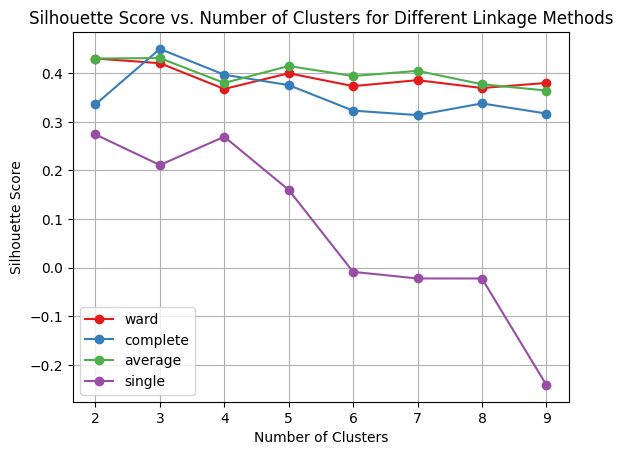

In [40]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

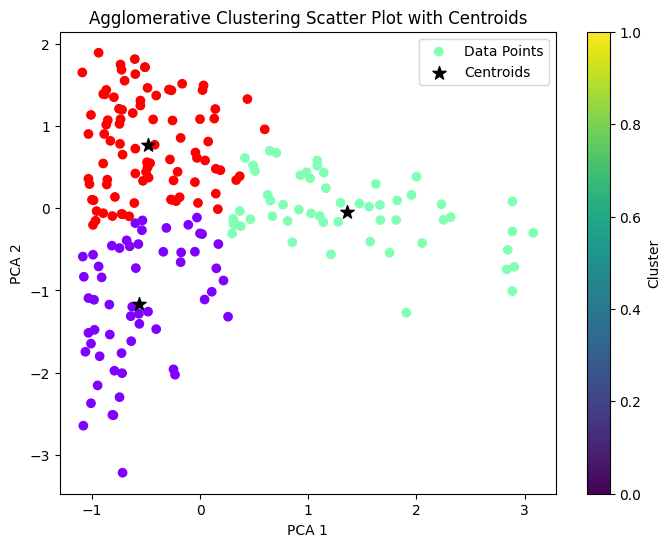

In [48]:
# because the only consideration for taking many clusters is just silhouette score.
# I will create 2 clusters with 'complete' linkage
n_cluster = 3
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage='complete')
labels = AC.fit_predict(pca_data)

df_train_with_labels = np.column_stack((pca_data, labels))

centroids = []
for cluster_label in range(n_cluster):  
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
    centroids.append(cluster_centroid)

centroids = np.array(centroids)

plt.figure(figsize=(8, 6))

x = pca_data[:, 0]
y = pca_data[:, 1]

plt.scatter(x, y, c=labels, cmap='rainbow', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=100, label='Centroids')

plt.title('Agglomerative Clustering Scatter Plot with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [42]:
linked = sch.linkage(pca_data, 'complete')

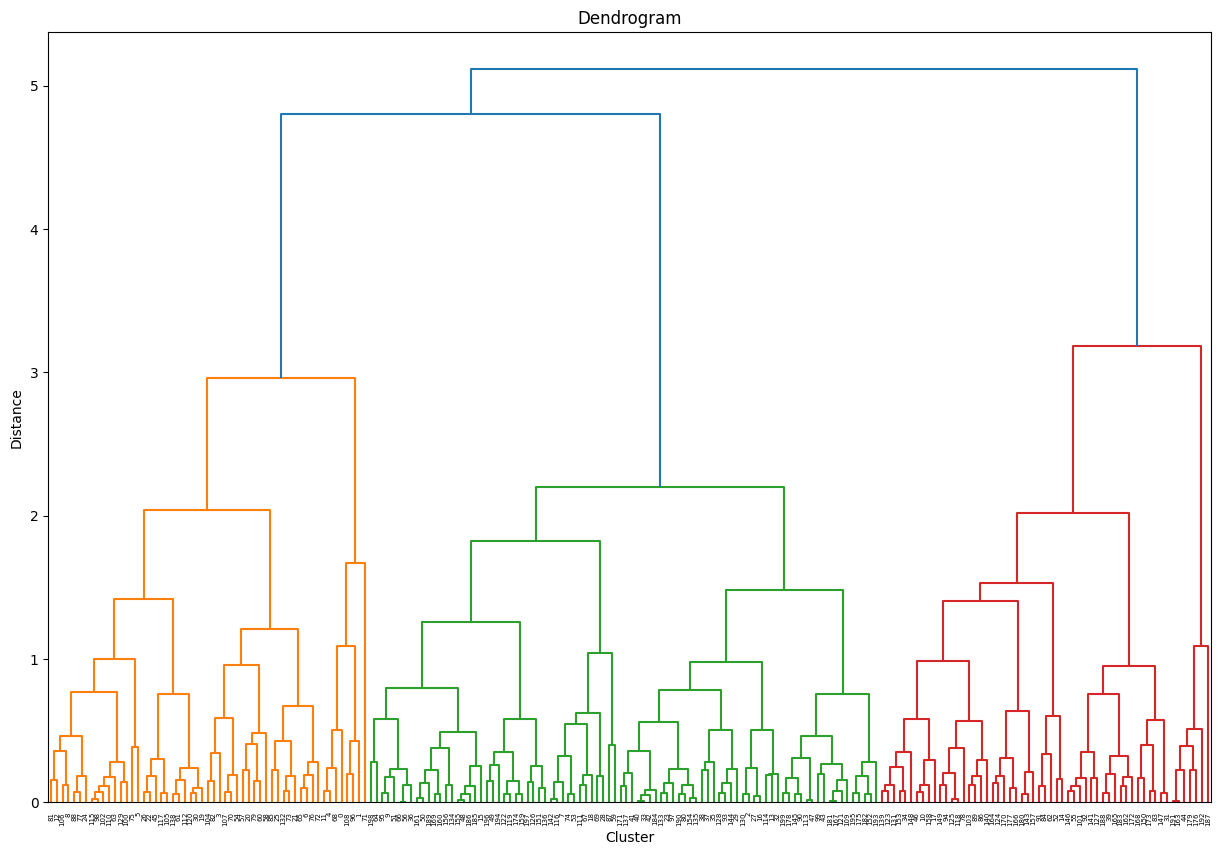

In [43]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.axhline(y=10, color='black', linestyle='--') # at this point, will divide the data into 2 clusters
plt.show()

DBScan

In [44]:
epsilon = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]
min_samples = [10, 15, 20, 25]

sil_avg = []
max_value = (0, 0, 0, -1)  # Initialize max_value with a negative silhouette score

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(pca_data)

        # Check if there are at least two clusters
        unique_labels = set(db.labels_)
        if len(unique_labels) >= 2:
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            # Number of clusters in labels, ignoring noise if present.
            n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

            silhouette_avg = silhouette_score(pca_data, labels)
            sil_avg.append(silhouette_avg)

            if silhouette_avg > max_value[3]:
                max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)

print("epsilon =", max_value[0],
      "\nmin_samples =", max_value[1],
      "\nnumber of clusters =", max_value[2],
      "\naverage silhouette score = %.4f" % max_value[3])

epsilon = 1 
min_samples = 25 
number of clusters = 1 
average silhouette score = 0.4504


In [45]:
db=DBSCAN(eps=2.5, min_samples=15, metric='euclidean')
db.fit(pca_data)

DBSCAN(eps=2.5, min_samples=15)

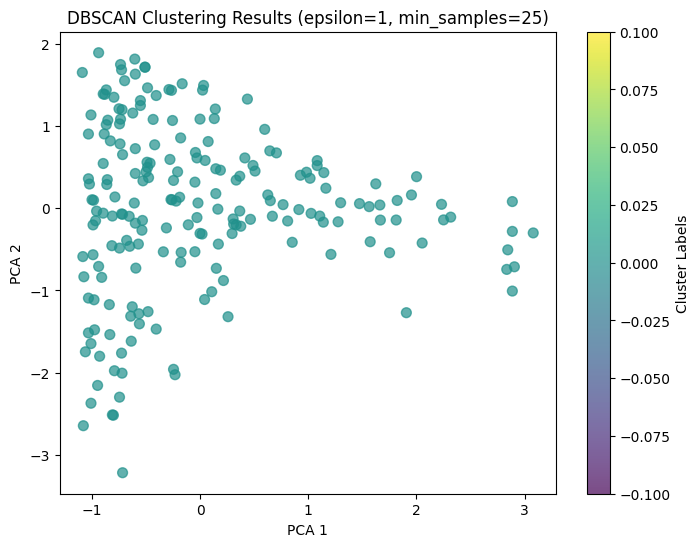

In [46]:
best_epsilon = max_value[0]
best_min_samples = max_value[1]
best_labels = db.labels_ 

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.7)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clustering Results (epsilon={}, min_samples={})'.format(best_epsilon, best_min_samples))

plt.colorbar(label='Cluster Labels')
plt.show()